# Figure 3G,H,I - DE put together

In [1]:
require(ggplot2)
library(ggrepel)

Loading required package: ggplot2



In [2]:
setwd('/gpfs/group/home/salee/Spatial_CMP')

## From Supplemental Table 4

In [35]:
# # needs DE file

DEfile1 = "Final_DE_SejongIn_Clinical_phenotype_bi_FullROI_Y_cellselection_Y_Cardiomyocytes_ROI_large_Vent_LV_DsSelect_Non_N_OL_N_RE_PID_Institute_KR_Y2023-06-22conditionDiseased_conditionControl"
DEfile2 = "Final_DE_SejongIn_Clinical_phenotype_bi_FullROI_Y_cellselection_Y_No_segmentation_ROI_large_Vent_LV_DsSelect_Non_N_OL_N_RE_PID_Institute_KR_Y2023-06-22conditionDiseased_conditionControl"

## Figure 3G

[1] 25600    14

[1] "CMC"    "No_Seg"

Warning message:
"Removed 25580 rows containing missing values (`geom_text_repel()`)."


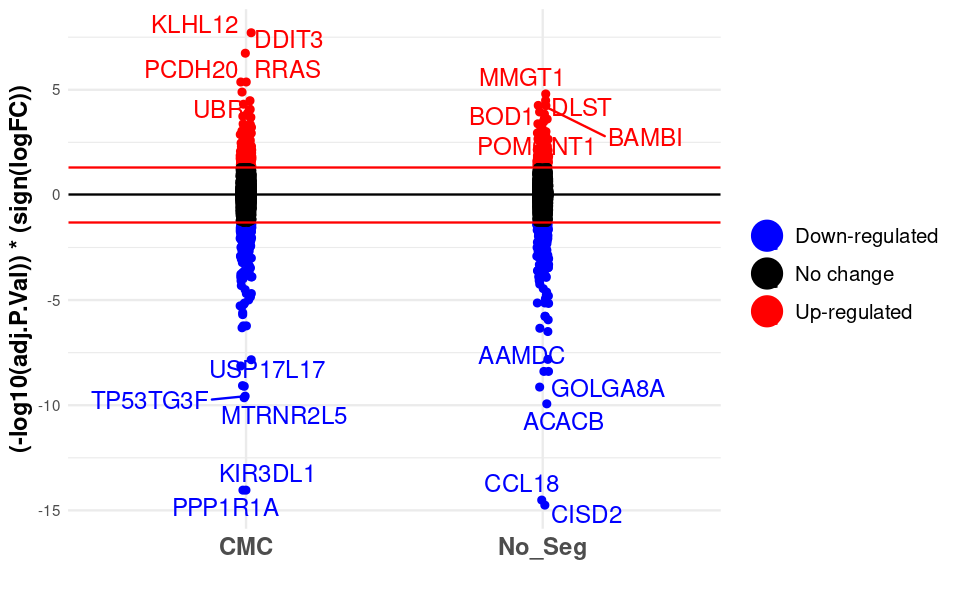

In [35]:
DE1 <- read.csv(file.path(getwd(), "results", paste0(DEfile1, ".csv")), row.names = 1, header = TRUE, stringsAsFactors=FALSE)
DE2 <- read.csv(file.path(getwd(), "results", paste0(DEfile2, ".csv")), row.names = 1, header = TRUE, stringsAsFactors=FALSE)


DE1$COI <- "CMC"
DE2$COI <- "No_Seg"

DE1$Index <- 1:nrow(DE1)
DE2$Index <- 1:nrow(DE2)

DE1$PosIndex[DE1$logFC > 0]<-1:nrow(DE1[DE1$logFC > 0,])
DE1$NegIndex[DE1$logFC < 0]<-1:nrow(DE1[DE1$logFC < 0,])

DE2$PosIndex[DE2$logFC > 0]<-1:nrow(DE2[DE2$logFC > 0,])
DE2$NegIndex[DE2$logFC < 0]<-1:nrow(DE2[DE2$logFC < 0,])

DE_total <- rbind(DE1, DE2)

dim(DE_total)

DE_total$diffexpressed <- "NO"
DE_total$diffexpressed[DE_total$logFC > 0 & DE_total$adj.P.Val < 0.05] <- "UP"
DE_total$diffexpressed[DE_total$logFC < 0 & DE_total$adj.P.Val < 0.05] <- "DOWN"
DE_total$delabel <- NA
DE_total$delabel[DE_total$PosIndex %in% c(1:5) | DE_total$NegIndex %in% c(1:5)] <- DE_total$SYMBOL[DE_total$PosIndex %in% c(1:5) | DE_total$NegIndex %in% c(1:5)]
DE_total$COI <- factor(DE_total$COI, levels=c("CMC", "No_Seg")
                       )


levels(DE_total$COI)

options(repr.plot.width=8, repr.plot.height=5)


ggplot(data=DE_total, aes(x=COI, y=(-log10(adj.P.Val))*(sign(logFC)), col=diffexpressed, label=delabel)) +
geom_jitter(width=0.02) +
theme_minimal() +
geom_text_repel(size=5
) +
scale_color_manual(values=c("blue", "black", "red"), labels=c('Down-regulated', 'No change', 'Up-regulated')) +
geom_hline(yintercept=c(-log10(0.05), log10(0.05)), col="red") +
geom_hline(yintercept=0, col="black") +
theme(axis.text.x=element_text(size=14,face="bold"),
        axis.title=element_text(size=14,face="bold"),
     legend.title=element_blank(),
     legend.text = element_text(size=12),
     ) +
xlab("") +
guides(color = guide_legend(override.aes = list(size = 8))) 

# Venn diagram

In [36]:
library("VennDiagram")

In [37]:
library(gridExtra)


In [30]:
options(repr.plot.width=10, repr.plot.height=10)


## Function for CasevsControl - draw_venndiagram

In [31]:

# read DE file
draw_venndiagram <- function(DEfile_1, DEfile_2){
DE1 <- read.csv(file.path(getwd(), "results", paste0(DEfile_1, ".csv")), row.names = 1, header = TRUE, stringsAsFactors=FALSE)
DE2 <- read.csv(file.path(getwd(), "results", paste0(DEfile_2, ".csv")), row.names = 1, header = TRUE, stringsAsFactors=FALSE)

# select significant DE gene symbols

DownDE1 <- rownames(DE1[DE1$logFC<0 & DE1$adj.P.Val<0.05,])
UpDE1 <-  rownames(DE1[DE1$logFC>0 & DE1$adj.P.Val<0.05,])

DownDE2 <- rownames(DE2[DE2$logFC<0 & DE2$adj.P.Val<0.05,])
UpDE2 <-  rownames(DE2[DE2$logFC>0 & DE2$adj.P.Val<0.05,])

# Downcomm <- intersect(DownDE1,DownDE2)
# (DownDE1uniq <- setdiff(DownDE1,DownDE2))
# (DownDE2uniq <- setdiff(DownDE2,DownDE1))

dc1 <- DownDE1
tc1 <- DownDE2
Vt1 <- venn.diagram(
  x = list(
    "Cardiomyocyte segmentation"=dc1,
    "No segmentation"=tc1
  ),
  #filename = "1B-double_Venn.tiff",
  main = "Differentially expressed genes - Down-regulated",
  main.cex = 1.2,
    main.fontfamily = "Arial",
    main.pos = c(0.5, 0.15),
  filename = NULL,
  lwd = 4,
  fill = c("cornflowerblue", "yellowgreen"),
  alpha = 0.75,
  label.col = "black",
  cex = 2,
  fontfamily = "Arial",
  fontface = "bold",
  cat.col = c("black", "black"),
  cat.cex = 1.2,
  cat.fontfamily = "Arial",
  # cat.fontface = "bold",
  cat.dist = c(0.03, 0.05),
  cat.pos = c(-5, -5)
)

dc2 <- UpDE1
tc2 <- UpDE2
Vt2 <- venn.diagram(
  x = list(
    "Cardiomyocyte segmentation"=dc2,
    "No segmentation"=tc2
  ),
  #filename = "1B-double_Venn.tiff",
  main = "Differentially expressed genes - Up-regulated",
  main.cex = 1.2,
    main.fontfamily = "Arial",
  main.pos = c(0.5, 0.15),

  filename = NULL,
  lwd = 4,
  fill = c("lightpink2", "orange"),
  alpha = 0.75,
  label.col = "black",
  cex = 2,
  fontfamily = "Arial",
  fontface = "bold",
  cat.col = c("black", "black"),
  cat.cex = 1.2,
  cat.fontfamily = "Arial",
  # cat.fontface = "bold",
  cat.dist = c(0.03, 0.05),
  cat.pos = c(-5, -5)
)
    
    grid.arrange(Vt1, Vt2, ncol=1)
            
    }


# Run

In [32]:
options(repr.plot.width=7, repr.plot.height=10)


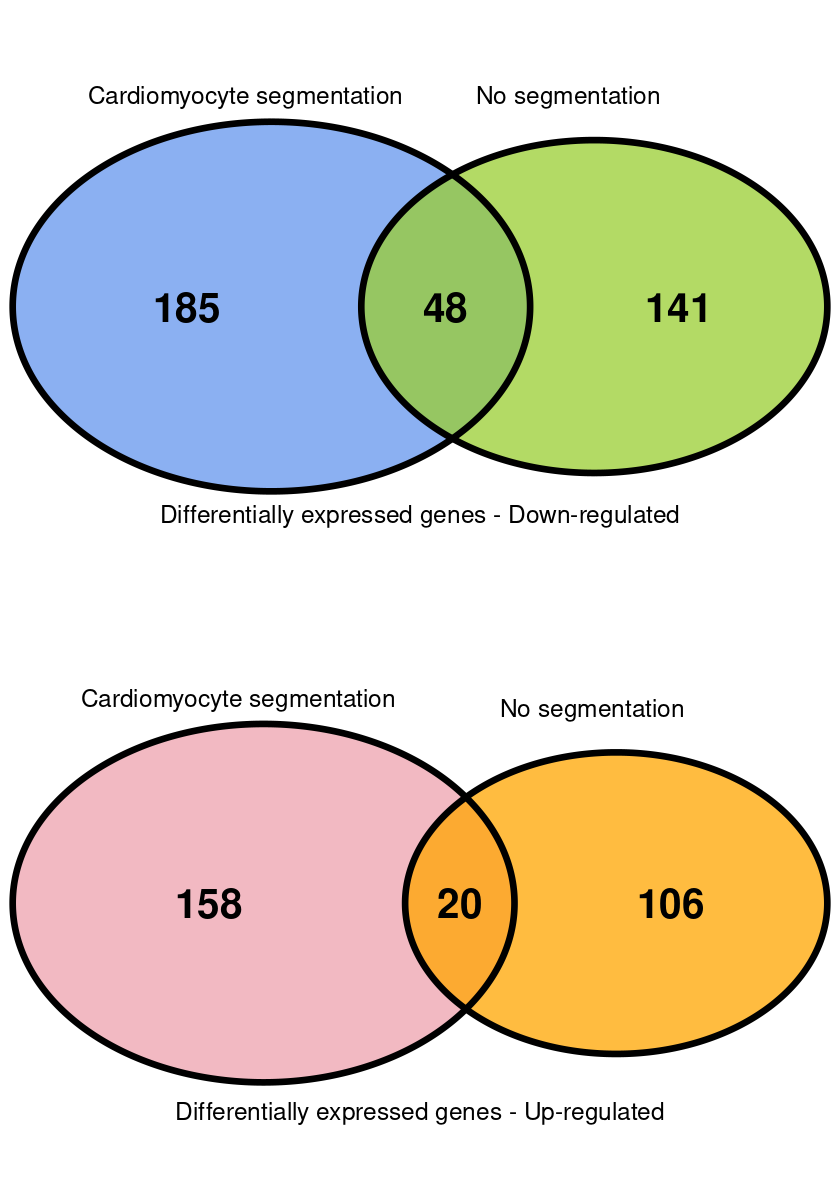

In [33]:
# When Case control are in right order
draw_venndiagram(DEfile1, DEfile2)

In [41]:
save.image(file = file.path(getwd(), paste("Spatialanalysis","Figure_3_5", Sys.Date(), 
                                           "analysis.RData", sep="_")))

print(file.path(getwd(), paste("Spatialanalysis","Figure_3_5", Sys.Date(), 
                                           "analysis.RData", sep="_")))

[1] "/gpfs/group/home/salee/Spatial_CMP/Spatialanalysis_Figure_3_5_2023-06-22_analysis.RData"


In [42]:
sessionInfo()

R version 4.0.0 (2020-04-24)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS:   /opt/applications/R/4.0.0/gnu/lib64/R/lib/libRblas.so
LAPACK: /opt/applications/R/4.0.0/gnu/lib64/R/lib/libRlapack.so

locale:
[1] C

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] gridExtra_2.3       VennDiagram_1.7.3   futile.logger_1.4.3
[4] ggbeeswarm_0.7.1    ggrepel_0.9.2       ggplot2_3.4.1      

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.10          formatR_1.14         vipor_0.4.5         
 [4] pillar_1.8.1         compiler_4.0.0       futile.options_1.0.1
 [7] base64enc_0.1-3      tools_4.0.0          digest_0.6.31       
[10] uuid_1.1-0           jsonlite_1.8.4       evaluate_0.20       
[13] lifecycle_1.0.3      tibble_3.2.0         gtable_0.3.1        
[16] pkgconfig_2.0.3      rlang_1.1.0          IRdisplay_1.1       
[19] cli_